# ASSIGNMENT 3 : 

# LOADING THE MODELS FOR PREDICTION AND GETTING THE CONFUSION MATRICES

## 1. IMPORT NECESSARY LIBRARIES

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import os
import random
from datetime import datetime 
import csv
import tensorflow as tf
from keras.models import load_model
from sklearn.metrics import classification_report

## 2. LOADING DATA INFO

##### Throughout both scripts the "load_data" function is used in every other function to retrieve information about data
##### The user can enter input about how many augmentations they want
##### aug_num = int(input('How many augmentations do you want? Enter an integer')) . There is also an option for minimum augmentations

In [ ]:
#Function to get details of data

def load_data(train_dir , test_dir):
    
    print('Function load data has been called....')
    print('The following function outputs a dictionary with key-value pairs as : \n')
    print("""output = {  'x_train_path'    : x_train_path,
            'x_test_path'     : x_test_path,
            'classes'         : classes,
            'class_number'    : class_number,
            'class_imbalance' : class_imbalance }""")
    print('\nUse the appropriate keys to access data\n\n')
    
    #Getting path to the files
    x_train_path = [train_dir +'/'+ i +'/' + j for i in os.listdir(train_dir) for j in os.listdir(train_dir+'/'+i) ]
    x_test_path  = [test_dir +'/'+ i for i in os.listdir(test_dir)]

    # Getting the class names and no. of images belonging to each class
    classes={}
    for i in os.listdir(train_dir):
        j = os.listdir(train_dir+'/'+i)
        classes[i]=len(j)
    print('*****************************************************************')
    print('No. of classes = ',len(classes) ,'\n')
    print('The given data has following classes with no. of images as given :\n\n',classes, '\n')
    

    #Assigning class_numbers to each class
    class_number = {}
    class_num = 0
    for i in os.listdir(train_dir):
        class_number[i] =  class_num
        class_num+=1
    print('*****************************************************************')
    print('The integers have been assigned to each class as given : \n\n',class_number,'\n')
    
    aug = str(input('Do you want minimum number of augmentations for balancing classes data? (y/n)'))
    if aug == 'y':
        class_imbalance={}
        for i in classes:
            class_imbalance[i]=max(classes.values())-classes[i]
        print('*****************************************************************')
        print('The class {} has maximum amt of data that is : {} '.format(max(classes,key=classes.get),max(classes.values())),'\n')
        print('Add given minimum num of images to balance the data : \n\n',class_imbalance)
    else:
        class_imbalance={}
        aug_num = int(input('How many augmentations do you want? Enter an integer'))
        for i in classes:
            class_imbalance[i]=aug_num-classes[i]
        print('\n*****************************************************************')
        print('Add given num of images to balance the data : \n\n',class_imbalance)

    output = {'x_train_path'    : x_train_path,
              'x_test_path'     : x_test_path,
              'classes'         : classes,
              'class_number'    : class_number,
              'class_imbalance' : class_imbalance}
    
    return output

In [ ]:
# X_train=np.load('E:/Q/Numpy arrays/X_train.npy')
# Y_train=np.load('E:/Q/Numpy arrays/Y_train.npy')
X_test = np.load('E:/Q/Numpy arrays/X_test.npy')

X_train_aug = np.load('E:/Q/Numpy arrays/X_train_aug.npy')
Y_train_aug = np.load('E:/Q/Numpy arrays/Y_train_aug.npy')

train_dir = 'E:/Q/plant-seedlings-classification/train'
test_dir = 'E:/Q/plant-seedlings-classification/test'
output = load_data(train_dir,test_dir)

Function load data has been called....
The following function outputs a dictionary with key-value pairs as : 

output = {  'x_train_path'    : x_train_path,
            'x_test_path'     : x_test_path,
            'classes'         : classes,
            'class_number'    : class_number,
            'class_imbalance' : class_imbalance }

Use the appropriate keys to access data


*****************************************************************
No. of classes =  12 

The given data has following classes with no. of images as given :

 {'Black-grass': 263, 'Charlock': 390, 'Cleavers': 287, 'Common Chickweed': 611, 'Common wheat': 221, 'Fat Hen': 475, 'Loose Silky-bent': 654, 'Maize': 221, 'Scentless Mayweed': 516, 'Shepherds Purse': 231, 'Small-flowered Cranesbill': 496, 'Sugar beet': 385} 

*****************************************************************
The integers have been assigned to each class as given : 

 {'Black-grass': 0, 'Charlock': 1, 'Cleavers': 2, 'Common Chickweed': 3, '

## 3. FUNC FOR SAVING TEST OUTPUT AS A CSV FILE AND GETTING CONFUSION MATRIX

In [ ]:
# Function to save predcition in csv format as (filename , classname)

def save_predicted_output(data, model_path, output, file_name):
    
    model = load_model(model_path)
    prediction = model.predict(data)


    pred_integer = np.argmax(prediction,axis=1)
    pred_class_name=[]
    for i in pred_integer:
            for key, value in output['class_number'].items():
                    if i==value:
                            pred_class_name.append(key)


    pred_file_names = [i.split('/')[-1] for i in output['x_test_path']]
    final_output = list(zip(pred_file_names,pred_class_name))

    with open(file_name + '.csv', mode='w', newline='') as file:
        
        writer = csv.writer(file)

        for row in final_output:
            writer.writerow(row)
            
    return final_output , prediction
    

In [ ]:
# Function to get the confusion matrix and plot it
# Function could be improved instead of taking "actual_output[:input_num]" the user can enter the range from X_train

def confusion_matrix(actual_output , predicted_output ,input_num ):    
    
    y_train = np.array( actual_output[:input_num] , dtype=int )
    y_train = np.argmax( y_train , axis=1 )

    prediction = np.array( predicted_output , dtype=int )
    prediction = np.argmax( prediction , axis=1 )

    conf_matrix = tf.math.confusion_matrix(
        y_train,
        prediction,
        num_classes=12,

    )
    
    print('*******************************************************************')
    print('The confusion matrix for the given inputs is : \n')
    print(conf_matrix)
    
    print('\n\n*******************************************************************')
    print('\n\nThe plot of confusion matrix for the given inputs is : \n')

    plt.figure()
    plt.title('Confusion Matrix')
    plt.imshow(conf_matrix,cmap='Blues')
    
    return conf_matrix

## 4. USING THE FUNCTIONS TO PLOT CONFUSION MATRICES FOR EACH MODEL

### 4.1 VGG 

63/63 [==============================] - 21s 155ms/step
*******************************************************************
The confusion matrix for the given inputs is : 

tf.Tensor(
[[147   0   0   0   0   0   0   0   0   0   0   0]
 [ 19 150   0   0   0   0   0   0   0   0   0   0]
 [  2   0 166   0   0   0   0   0   0   0   0   0]
 [ 18   0   0 168   0   0   0   0   0   0   0   0]
 [106   0   0   0  72   0   0   0   0   0   0   0]
 [ 58   0   0   0   0 113   0   0   0   0   0   0]
 [158   0   0   0   0   0  24   0   0   0   0   0]
 [ 12   0   0   0   0   0   0 152   0   0   0   0]
 [ 37   0   0   0   0   0   0   0 122   0   0   0]
 [ 33   0   0   0   0   0   0   0   0 127   0   0]
 [ 21   0   0   0   0   0   0   0   0   0 140   0]
 [ 32   0   0   0   0   0   0   0   0   0   0 123]], shape=(12, 12), dtype=int32)


*******************************************************************


The plot of confusion matrix for the given inputs is : 



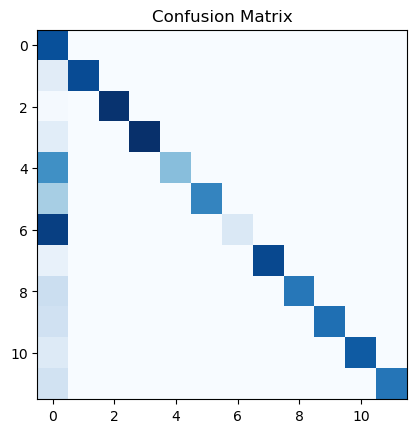

In [ ]:
output_vgg , prediction_vgg = save_predicted_output(X_train_aug[:2000],
                                                                 'E:/Q/Trained_models/With augmentation/VGG16-aug-5epochs.hdf5'
                                                                 ,output,'vgg_pred_train' )

confusion_matrix_vgg = confusion_matrix(Y_train_aug , prediction_vgg , 2000)

### 4.2 RES-NET 50

63/63 [==============================] - 6s 74ms/step
*******************************************************************
The confusion matrix for the given inputs is : 

tf.Tensor(
[[147   0   0   0   0   0   0   0   0   0   0   0]
 [ 27 142   0   0   0   0   0   0   0   0   0   0]
 [ 79   0  89   0   0   0   0   0   0   0   0   0]
 [159   0   0  27   0   0   0   0   0   0   0   0]
 [166   0   0   0  12   0   0   0   0   0   0   0]
 [ 90   0   0   0   0  81   0   0   0   0   0   0]
 [176   0   0   0   0   0   6   0   0   0   0   0]
 [ 51   0   0   0   0   0   0 113   0   0   0   0]
 [114   0   0   0   0   0   0   0  45   0   0   0]
 [111   0   0   0   0   0   0   0   0  49   0   0]
 [ 34   0   0   0   0   0   0   0   0   0 127   0]
 [ 51   0   0   0   0   0   0   0   0   0   0 104]], shape=(12, 12), dtype=int32)


*******************************************************************


The plot of confusion matrix for the given inputs is : 



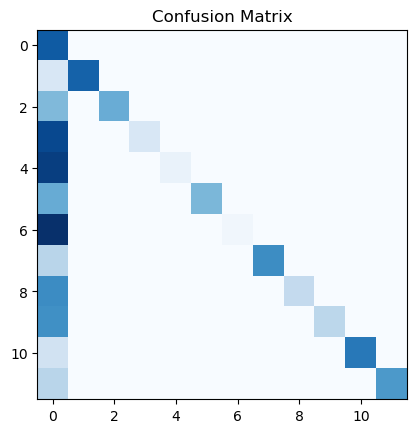

In [ ]:
output_resnet , prediction_resnet = save_predicted_output(X_train_aug[:2000],
                                                          'E:/Q/Trained_models/With augmentation/Resnet50-aug-5epochs.hdf5'
                                                           ,output,'resnet_pred_train' )

confusion_matrix_resnet = confusion_matrix(Y_train_aug , prediction_resnet , 2000)

### 4.3 INCEPTION V3

63/63 [==============================] - 7s 81ms/step
*******************************************************************
The confusion matrix for the given inputs is : 

tf.Tensor(
[[147   0   0   0   0   0   0   0   0   0   0   0]
 [164   5   0   0   0   0   0   0   0   0   0   0]
 [152   0  16   0   0   0   0   0   0   0   0   0]
 [178   0   0   8   0   0   0   0   0   0   0   0]
 [178   0   0   0   0   0   0   0   0   0   0   0]
 [168   0   0   0   0   3   0   0   0   0   0   0]
 [182   0   0   0   0   0   0   0   0   0   0   0]
 [159   0   0   0   0   0   0   5   0   0   0   0]
 [156   0   0   0   0   0   0   0   3   0   0   0]
 [160   0   0   0   0   0   0   0   0   0   0   0]
 [120   0   0   0   0   0   0   0   0   0  41   0]
 [153   0   0   0   0   0   0   0   0   0   0   2]], shape=(12, 12), dtype=int32)


*******************************************************************


The plot of confusion matrix for the given inputs is : 



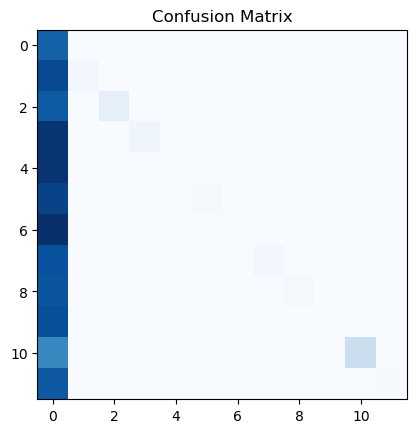

In [ ]:
output_incepV3 , prediction_incepV3 = save_predicted_output(X_train_aug[:2000],
                                                           'E:/Q/Trained_models/With augmentation/inceptionv3-aug-5epochs.hdf5'
                                                            ,output,'incepV3' )

confusion_matrix_incepV3 = confusion_matrix(Y_train_aug , prediction_incepV3 , 2000)

In [ ]:
#Sample CSV ouput , variables have been changed 

for i in random.sample(range(len(X_test)),1):
        print(vgg16_pred[i:i+5] ,'\n')
        print(resnet50_pred[i:i+5],'\n')
        print(inception_V3_pred[i:i+5] ,'\n')

[('3e9f41817.png', 'Loose Silky-bent'), ('3ebbe9ca4.png', 'Charlock'), ('3eda9cbb6.png', 'Scentless Mayweed'), ('3edf5e9ef.png', 'Common wheat'), ('3eebd36c6.png', 'Charlock')] 

[('3e9f41817.png', 'Loose Silky-bent'), ('3ebbe9ca4.png', 'Charlock'), ('3eda9cbb6.png', 'Scentless Mayweed'), ('3edf5e9ef.png', 'Common wheat'), ('3eebd36c6.png', 'Charlock')] 

[('3e9f41817.png', 'Common wheat'), ('3ebbe9ca4.png', 'Charlock'), ('3eda9cbb6.png', 'Fat Hen'), ('3edf5e9ef.png', 'Common wheat'), ('3eebd36c6.png', 'Charlock')] 



## 5. CLASSIFICATION REPORT

#### The below classification reports can be added to the confusion matrix function itself

### 5.1 VGG16

In [ ]:
class_names = list(output['classes'].keys())


prediction_for_vgg = np.argmax( prediction_vgg , axis=1 )
y_vgg = np.argmax( Y_train_aug[:2000] , axis=1 )

In [ ]:
print(classification_report( y_vgg , prediction_for_vgg, target_names=class_names))

                           precision    recall  f1-score   support

              Black-grass       0.97      0.88      0.92       147
                 Charlock       1.00      0.98      0.99       169
                 Cleavers       0.97      1.00      0.99       168
         Common Chickweed       0.99      1.00      0.99       186
             Common wheat       0.98      0.97      0.97       178
                  Fat Hen       1.00      0.96      0.98       171
         Loose Silky-bent       0.85      0.97      0.91       182
                    Maize       1.00      0.98      0.99       164
        Scentless Mayweed       1.00      1.00      1.00       159
          Shepherds Purse       1.00      0.99      1.00       160
Small-flowered Cranesbill       1.00      1.00      1.00       161
               Sugar beet       1.00      0.98      0.99       155

                 accuracy                           0.98      2000
                macro avg       0.98      0.98      0.98    

### 5.2 RESNET50

In [ ]:
prediction_for_resnet = np.argmax( prediction_resnet , axis=1 )
y_resnet = np.argmax( Y_train_aug[:2000] , axis=1 )

In [ ]:
print(classification_report( y_resnet , prediction_for_resnet, target_names=class_names))

                           precision    recall  f1-score   support

              Black-grass       0.92      0.92      0.92       147
                 Charlock       0.99      1.00      0.99       169
                 Cleavers       0.98      0.99      0.99       168
         Common Chickweed       0.99      1.00      1.00       186
             Common wheat       0.99      0.96      0.97       178
                  Fat Hen       0.98      0.99      0.98       171
         Loose Silky-bent       0.89      0.94      0.91       182
                    Maize       1.00      0.96      0.98       164
        Scentless Mayweed       0.99      0.99      0.99       159
          Shepherds Purse       1.00      1.00      1.00       160
Small-flowered Cranesbill       1.00      0.99      0.99       161
               Sugar beet       0.99      0.99      0.99       155

                 accuracy                           0.98      2000
                macro avg       0.98      0.98      0.98    

### 5.3 INCEPTION V3

In [ ]:
prediction_incepV3 = np.argmax( prediction_incepV3 , axis=1 )
y_incepV3 = np.argmax( Y_train_aug[:2000] , axis=1 )

In [ ]:
print(classification_report( y_incepV3 , prediction_incepV3, target_names=class_names))

                           precision    recall  f1-score   support

              Black-grass       0.97      0.89      0.93       147
                 Charlock       0.98      1.00      0.99       169
                 Cleavers       0.93      0.99      0.96       168
         Common Chickweed       0.96      0.93      0.94       186
             Common wheat       0.91      0.96      0.93       178
                  Fat Hen       0.99      0.94      0.96       171
         Loose Silky-bent       0.92      0.96      0.94       182
                    Maize       0.95      0.95      0.95       164
        Scentless Mayweed       0.92      0.99      0.95       159
          Shepherds Purse       0.98      0.92      0.95       160
Small-flowered Cranesbill       0.99      0.98      0.98       161
               Sugar beet       0.99      0.95      0.97       155

                 accuracy                           0.95      2000
                macro avg       0.96      0.95      0.95    

## CONCLUSION : VGG16 MODEL PERFORMS BEST ON THE DATA 
## UPLOADED CSV FILES ARE PREDICTIONS FOR THE TEST DATA